## Support Vector Regression (SVR)

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scalling

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [12]:
x.shape,y.shape

((10, 1), (10, 1))

## Traning the SVR model on the Data set

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [16]:
regressor.predict(x)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [17]:
t2=sc_y.inverse_transform([[6]])
t2

array([[1953566.01984782]])

In [19]:
t3=sc_y.inverse_transform(x)
t3

array([[-195459.7274933 ],
       [ -96579.78805034],
       [   2300.15139261],
       [ 101180.09083557],
       [ 200060.03027852],
       [ 298939.96972148],
       [ 397819.90916443],
       [ 496699.84860739],
       [ 595579.78805034],
       [ 694459.7274933 ]])


## Visualising the SVR result

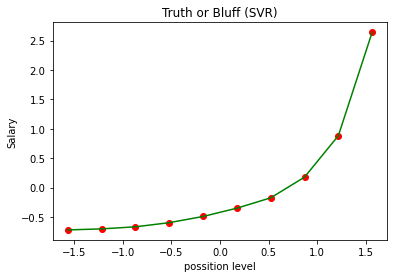

In [20]:
plt.scatter(sc_x.fit_transform(x), sc_y.fit_transform(y), color = 'red')
plt.plot(sc_x.fit_transform(x), sc_y.fit_transform(y), color = 'green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('possition level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR result (for higer resolution and smoother curve)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.59505424 -0.61913525 -0.6330178  -0.63692493 -0.63177473 -0.61906091
 -0.60067735 -0.57871001 -0.55521864 -0.53202516 -0.51051903 -0.49148519
 -0.47495928 -0.46011944 -0.44523181 -0.42767428 -0.40406641 -0.37052783
 -0.32307141 -0.25811185 -0.17304016 -0.06678635  0.05972445  0.20331758
  0.35859043  0.51824434  0.67370946  0.81599082  0.93662031  1.02857515
  1.0870259   1.10980538].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

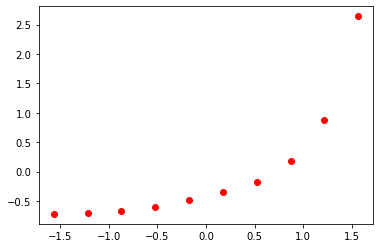

In [24]:
x_grid = np.arange(min(sc_x.fit_transform(x)), max(sc_x.fit_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.fit_transform(x), sc_y.fit_transform(y), color = "red")
plt.plot(x_grid, sc_y.fit_transform(regressor.predict(sc_x.fit_transform(x_grid))), color = 'blue')
plt.xlabel('possition level')
plt.ylabel('Salary')
plt.show()